In [63]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from functions import getRmse

# enfim, como não teve como usar o da boston. vai esse.

In [64]:
housing = fetch_california_housing()
california = pd.DataFrame(housing.data,columns=housing.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [65]:
california.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<Axes: >

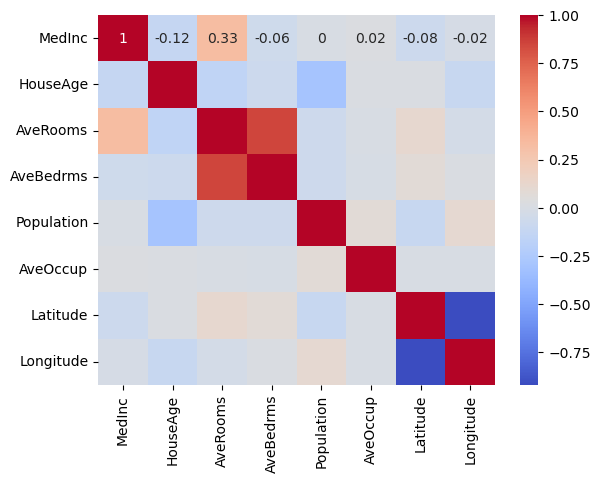

In [66]:
correlation_matrix = california.corr().round(2)

sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm')

tem algum tipo de correlação entre AveBedrmms e AveRooms
também entre averooms e medinc, avebedrms e medinc

In [67]:
target = california['MedInc']
features = ["AveRooms","AveBedrms"]

Agora a gente começa com os modelos de teste e de treino

In [68]:
X = pd.DataFrame(np.c_[california[features[0]],california[features[1]]],columns=features)
Y = target

In [69]:
# separando os dados em de teste e de treino

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [70]:
# agora usamos as funcionalidades de regressão linear

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
model = Pipeline([
    ('std_scaler',StandardScaler()),
    ('poly',PolynomialFeatures(3)),
    ('lin_reg',LinearRegression())
])

model.fit(X_train,Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('lin_reg', LinearRegression())])

In [72]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.1518973443223264
R2 score is 0.6279601788559803




In [73]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1.174654839734471
R2 score is 0.6349427766482265


Eu acho que pra ver um gráfico disso eu teria que primeiro plotar em 3d porque são duas features invés de uma. Então, isso deve estar afetando o gráfico. Quando eu faço com um funciona

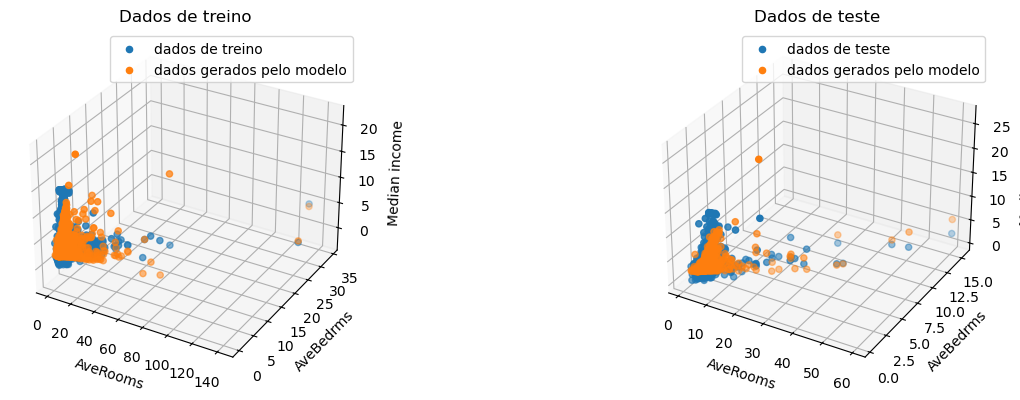

In [74]:

fig, axes = plt.subplots(nrows=1,ncols=2,subplot_kw={'projection': '3d'},figsize=(15,4))


axes[0].scatter(X_train['AveRooms'],X_train['AveBedrms'],Y_train,label="dados de treino")
axes[0].scatter(X_train['AveRooms'],X_train['AveBedrms'],model.predict(X_train),label='dados gerados pelo modelo')
axes[0].set_title("Dados de treino")

axes[0].set_xlabel("AveRooms")
axes[0].set_ylabel('AveBedrms')
axes[0].set_zlabel('Median income')
axes[0].legend()

axes[1].scatter(X_test['AveRooms'],X_test['AveBedrms'],Y_test,label="dados de teste")
axes[1].scatter(X_test['AveRooms'],X_test['AveBedrms'],model.predict(X_test),label='dados gerados pelo modelo')
axes[1].set_title("Dados de teste")

axes[1].set_xlabel("AveRooms")
axes[1].set_ylabel('AveBedrms')
axes[1].set_zlabel('Median income')
axes[1].legend()

plt.tight_layout()

In [90]:
max_degree = 6
rmses_train = np.zeros((max_degree))
rmses_test = np.zeros((max_degree))
degrees = np.arange(1,max_degree+1,1)

for i in range(max_degree):
    rmse_train,rmse_test = getRmse(X_train,Y_train,X_test,Y_test,i)
    rmses_train[i] += rmse_train
    rmses_test[i] += rmse_test

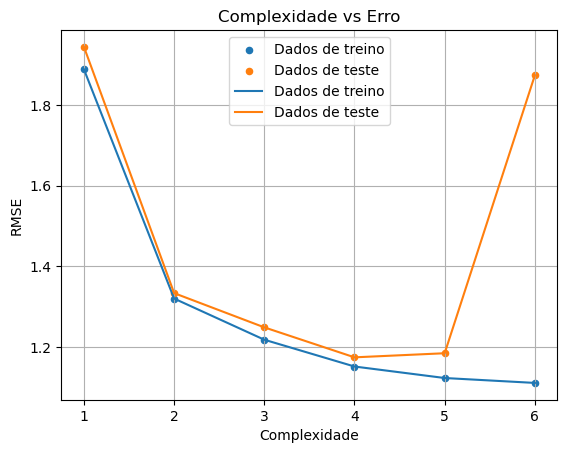

In [91]:

radius = 20
plt.scatter(degrees,rmses_train,label='Dados de treino',s=radius)
plt.scatter(degrees,rmses_test,label='Dados de teste',s=radius)
plt.plot(degrees,rmses_train,label='Dados de treino')
plt.plot(degrees,rmses_test,label='Dados de teste')

plt.xlabel('Complexidade')
plt.ylabel('RMSE')
plt.title('Complexidade vs Erro')
plt.grid(True)
plt.legend()
plt.show()

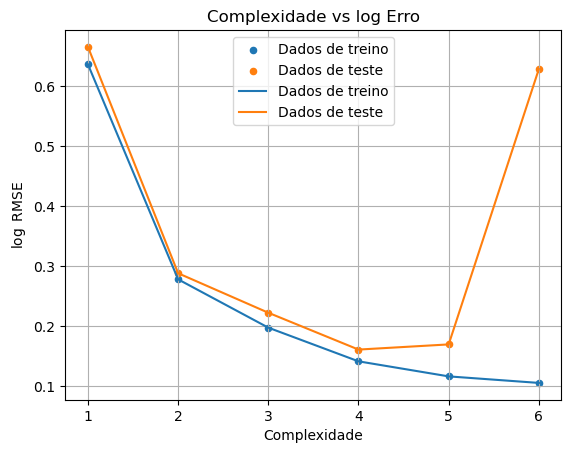

In [92]:

plt.scatter(degrees,np.log(rmses_train),label='Dados de treino',s=radius)
plt.scatter(degrees,np.log(rmses_test),label='Dados de teste',s=radius)
plt.plot(degrees,np.log(rmses_train),label='Dados de treino')
plt.plot(degrees,np.log(rmses_test),label='Dados de teste')

plt.xlabel('Complexidade')
plt.ylabel('$\\log$ RMSE')
plt.title('Complexidade vs log Erro')
plt.grid(True)
plt.legend()
plt.show()

In [93]:
rmses_test

array([1.94419946, 1.33383383, 1.24896627, 1.17465484, 1.18481846,
       1.87391707])